<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [261]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [264]:
#Importing the necessary libraries

import warnings

warnings.filterwarnings("ignore")

# Data manipulation libs
import numpy as np
import pandas as pd

# Data split libs
from sklearn.model_selection import train_test_split

# oversample and undersample of data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# Data visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [375]:
visa_data = pd.read_csv('EasyVisa.csv')
#copy of data to work with
data = visa_data

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [357]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Understand the shape of the dataset

In [274]:
print(f'The shape of the data {data.shape}')
print(f'Data have {data.isnull().sum().sum()} null values')
data.nunique()

The shape of the data (25480, 12)
Data have 0 null values


case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

#### Check the data types of the columns for the dataset

In [277]:
data.info()
print(f'There are totoal {data.shape[1]} columns and only 3 columns have numerical data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
There are totoal 12 columns and only 3 columns have numerical data


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [281]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Fixing the negative values in number of employees columns

In [284]:
data.loc[data['no_of_employees'] < 0].shape
print(f'There are {data.loc[data['no_of_employees'] < 0].shape[0]} rows with negative employees data')
#converting negative values to absolute as it looks like the data entry is incorrect
data['no_of_employees'] = data['no_of_employees'].abs()

There are 33 rows with negative employees data


#### Let's check the count of each unique category in each of the categorical variables

In [287]:
# Making a list of all catrgorical variables
category_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in category_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [289]:
#case_id is unique value and occurs for each row, dropping the column.
print(f'Number of unique values in case_id column: {data['case_id'].nunique()}')
data.drop(['case_id'], axis=1, inplace=True)

Number of unique values in case_id column: 25480


### Univariate Analysis

In [292]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [294]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [296]:
#function to create box plot
def plot_multiple_boxplots(data, columns, rows=3, cols=4, figsize=(16, 12)):
    """
    Plots multiple boxplots in a grid layout.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data.
    - columns (list): List of column names to plot.
    - rows (int, optional): Number of rows in the grid.
    - cols (int, optional): Number of columns in the grid.
    - figsize (tuple, optional): Size of the figure.

    Returns:
    - Displays a grid of boxplots.
    """
    total_plots = len(columns)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten axes for easy iteration

    for i, column in enumerate(columns):
        if i < len(axes):  # Ensure we don't exceed available axes
            sns.boxplot(data=data, y=column, ax=axes[i], palette="Set2")
            axes[i].set_title(f"Box Plot: {column}")
            axes[i].set_ylabel(column)

    # Hide any unused subplots in case the total plots are less than rows*cols
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

#### Observations on education of employee

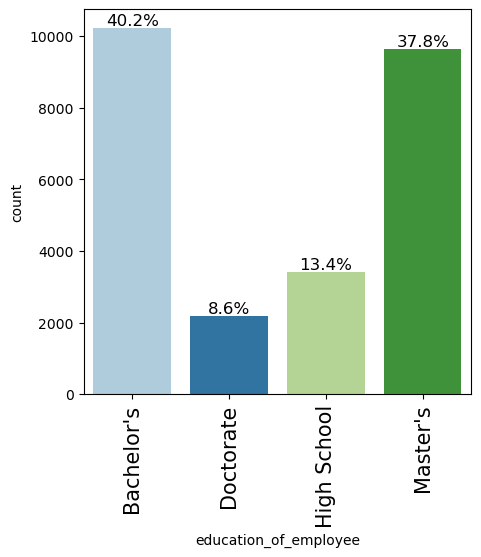

In [299]:
labeled_barplot(data, "education_of_employee", perc=True)

#### Observations on region of employment

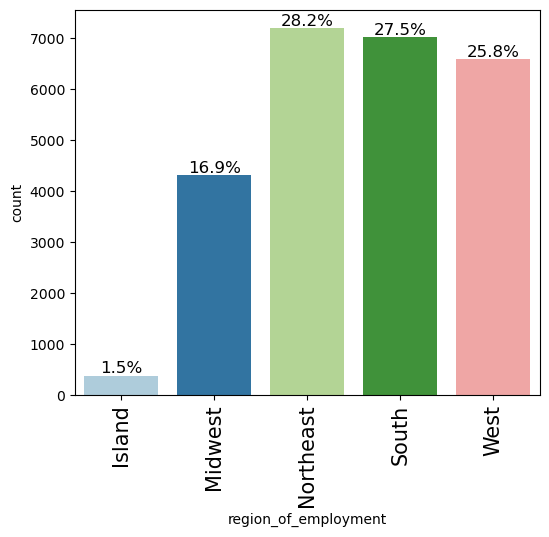

In [302]:
labeled_barplot(data, "region_of_employment", perc=True)

#### Observations on job experience

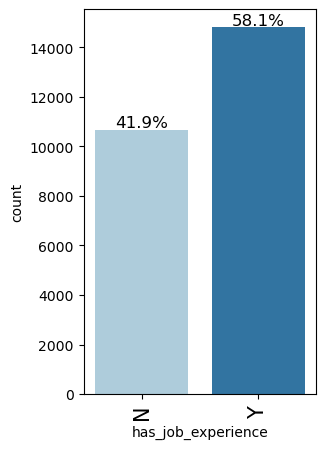

In [305]:
labeled_barplot(data, "has_job_experience", perc=True)

#### Observations on case status

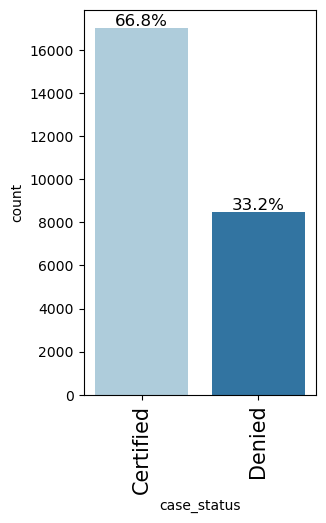

In [308]:
labeled_barplot(data, "case_status", perc=True)

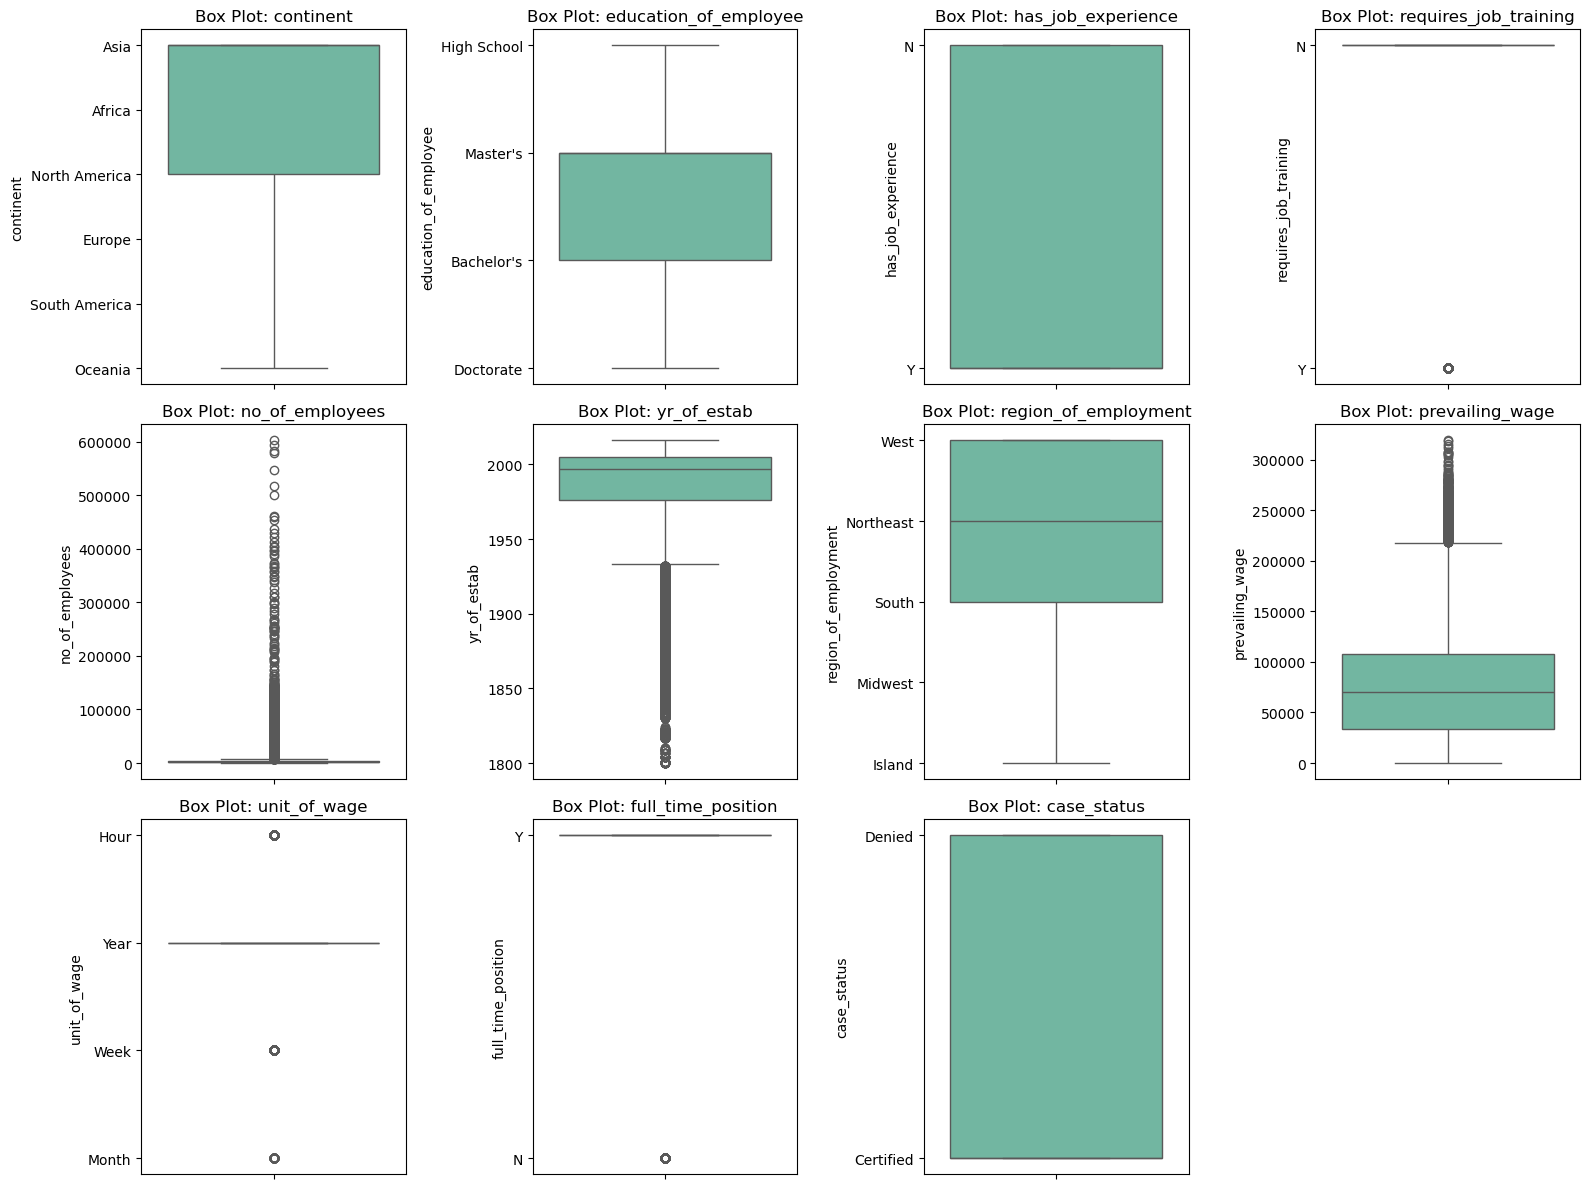

In [310]:
plot_multiple_boxplots(data, data.columns, rows=3, cols=4, figsize=(16, 12))

### Bivariate Analysis

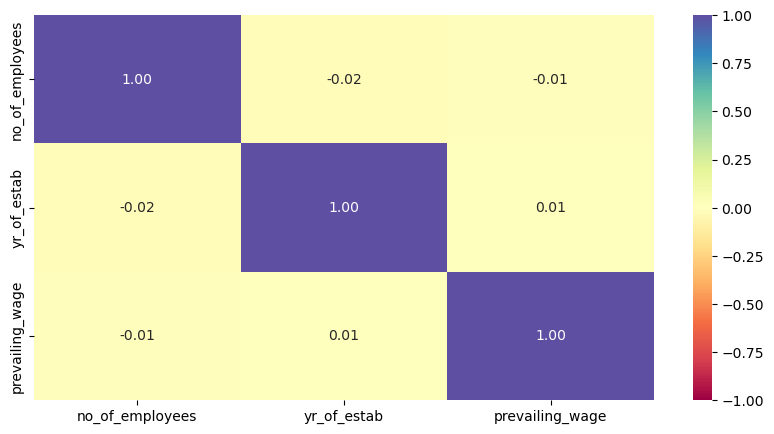

In [312]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

**Creating functions that will help us with further analysis.**

In [316]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [318]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


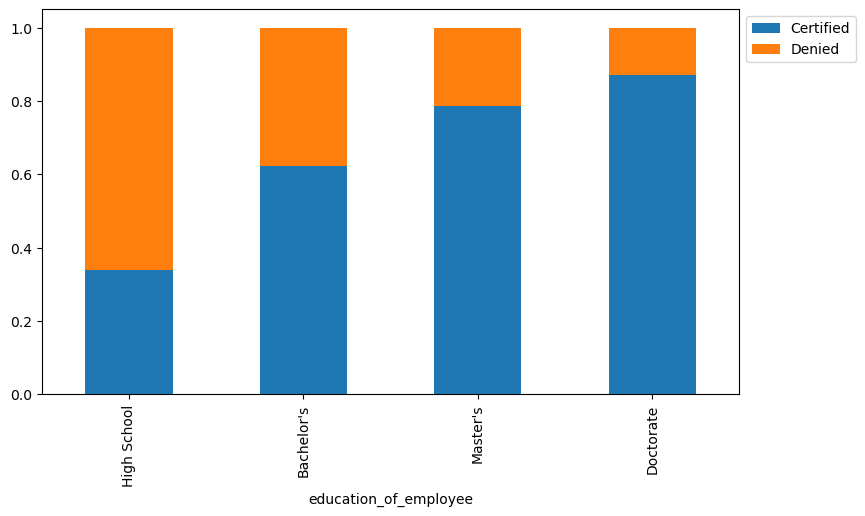

In [321]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


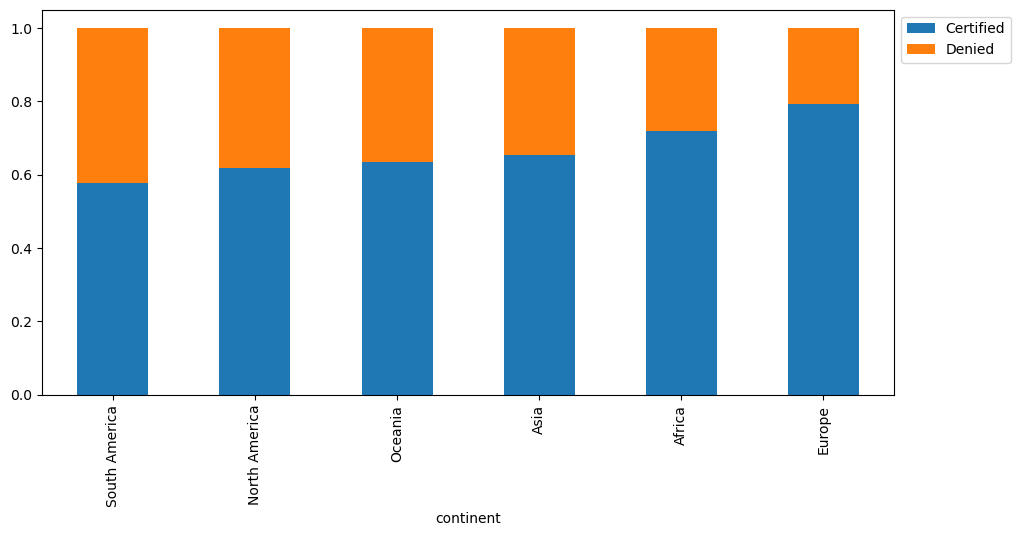

In [324]:
stacked_barplot(data, 'continent', 'case_status' )

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


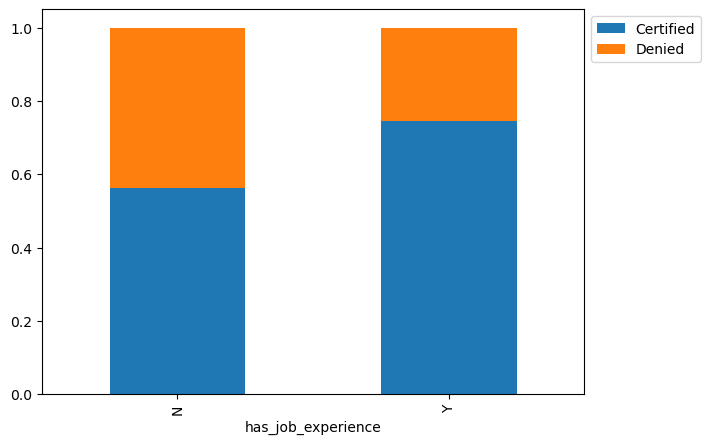

In [327]:
stacked_barplot(data, 'has_job_experience', 'case_status' )

#### Checking if the prevailing wage is similar across all the regions of the US

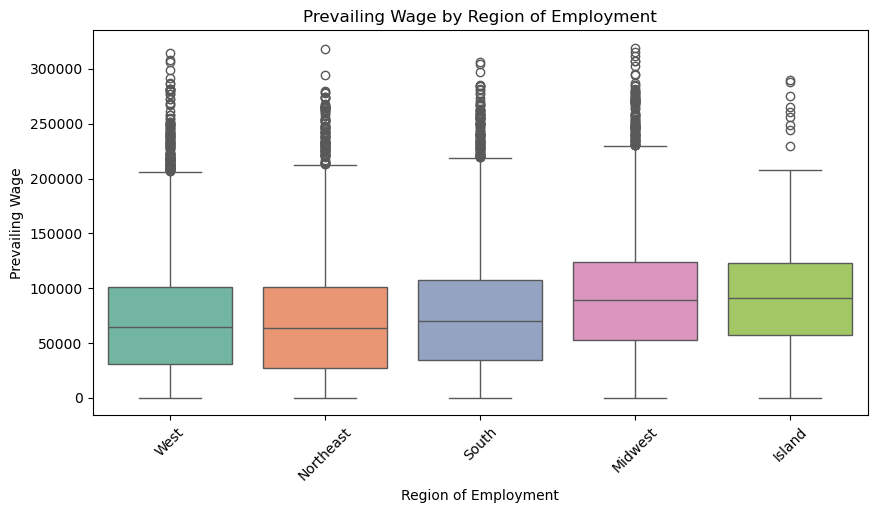

In [330]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", palette="Set2")
plt.title("Prevailing Wage by Region of Employment")
plt.xlabel("Region of Employment")
plt.ylabel("Prevailing Wage")
plt.xticks(rotation=45)  # Rotates x-axis labels if needed
plt.show()

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

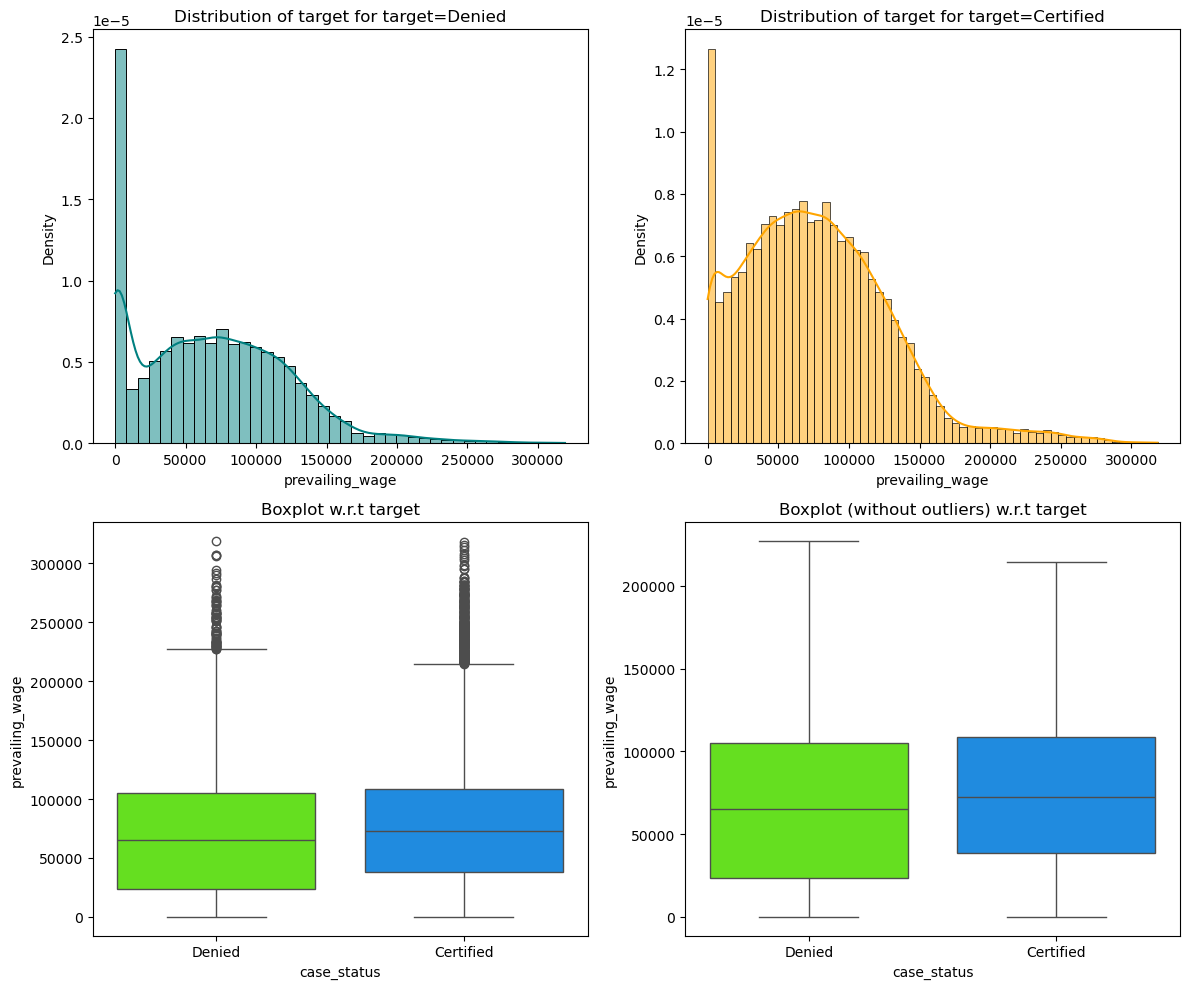

In [333]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status' )

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


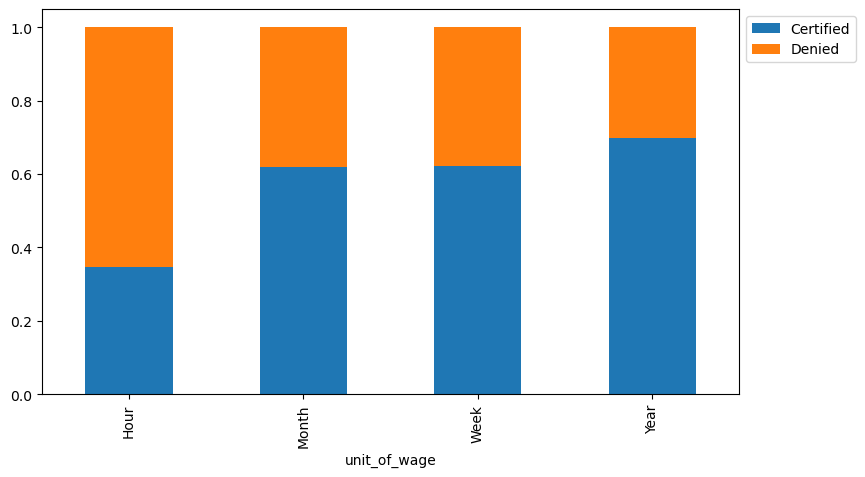

In [336]:
stacked_barplot(data, 'unit_of_wage','case_status')

## Data Pre-processing

### Outlier Check

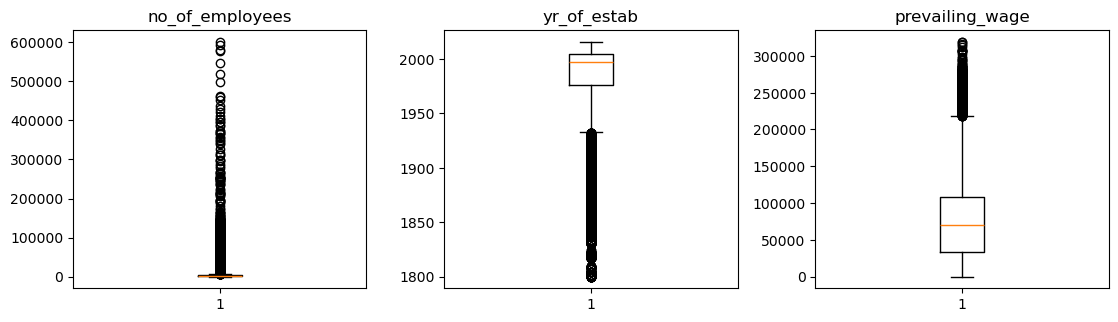

In [340]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [377]:
print(data['case_status'].nunique())
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(columns=['case_status']) ## Complete the code to drop case status from the data
y = data["case_status"]
print(y)
X = pd.get_dummies(X, drop_first=True)
print("Class distribution in y before splitting:", np.bincount(y))
# Complete the code to split the dataset into train and valid with a ratio of 7:3
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check distribution after first split
print("Class distribution in y_train:", np.bincount(y_train))
print("Class distribution in y_val:", np.bincount(y_val))

# # Complete the code to split the dataset into valid and test with a ratio of 9:1
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.1,random_state=42,stratify=y_val
)


# Check distribution after second split
print("Class distribution in y_val:", np.bincount(y_val))
print("Class distribution in y_test:", np.bincount(y_test))

print(data['case_status'].nunique())

2
0        0
1        1
2        0
3        0
4        1
        ..
25475    1
25476    1
25477    1
25478    1
25479    1
Name: case_status, Length: 25480, dtype: int64
Class distribution in y before splitting: [ 8462 17018]
Class distribution in y_train: [ 5923 11913]
Class distribution in y_val: [2539 5105]
Class distribution in y_val: [2285 4594]
Class distribution in y_test: [254 511]
2


In [379]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_val Shape: {X_val.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_val Shape: {y_val.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (17836, 25500)
X_val Shape: (6879, 25500)
X_test Shape: (765, 25500)
y_train Shape: (17836,)
y_val Shape: (6879,)
y_test Shape: (765,)


## Model Building

### Model Evaluation Criterion
Provide some reasoning for choosing the metric here : ______

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [381]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [383]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

In [386]:
# Define scorers
scorers = {
    "F1": metrics.make_scorer(metrics.f1_score),google
    "Recall": metrics.make_scorer(metrics.recall_score),
    "Accuracy": metrics.make_scorer(metrics.accuracy_score),
    "Precision": metrics.make_scorer(metrics.precision_score),
}

### Model building with original data

In [390]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=42)))
models.append(("Random forest",RandomForestClassifier(random_state=42))) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", GradientBoostingClassifier(random_state=42))) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", AdaBoostClassifier(random_state=42))) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("dtree", DecisionTreeClassifier(random_state=42))) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
cv_results_dict = {}
validation_results_dict = {}


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    scores_dict = {}
    kfold = StratifiedKFold(
            n_splits=5, shuffle=True, random_state=42
        )  # Complete the code to set the number of splits.
    for score_name, score_func in scorers.items():
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring = score_func,cv=kfold
        )
        scores_dict[score_name] = cv_result.mean()
    cv_results_dict[name] = scores_dict

cv_results_df = pd.DataFrame(cv_results_dict).T
print(cv_results_df)

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)  # Train the model
    scores_dict = {}
    
    for score_name, score_func in scorers.items():
        score_value = score_func(model, X_val, y_val)
        scores_dict[score_name] = score_value
    validation_results_dict[name] = scores_dict  # Add model's results to main dictionary
# Convert dictionary to DataFrame
validation_results_df = pd.DataFrame(validation_results_dict).T  # Transpose to get models as rows

# Print the DataFrame
print(validation_results_df)



Cross-Validation performance on training dataset:

                     F1    Recall  Accuracy  Precision
Bagging        0.812325  0.843197  0.739796   0.783682
Random forest  0.823722  0.893395  0.744618   0.764150
GBM            0.824952  0.875515  0.751851   0.779928
Adaboost       0.818088  0.884664  0.737217   0.760844
dtree          0.783394  0.805843  0.702344   0.762281

Validation Performance:

                     F1    Recall  Accuracy  Precision
Bagging        0.808840  0.840444  0.734700   0.779528
Random forest  0.819702  0.891162  0.738189   0.758851
GBM            0.821895  0.875925  0.746475   0.774144
Adaboost       0.812946  0.880279  0.729466   0.755182
dtree          0.781010  0.809316  0.696904   0.754617


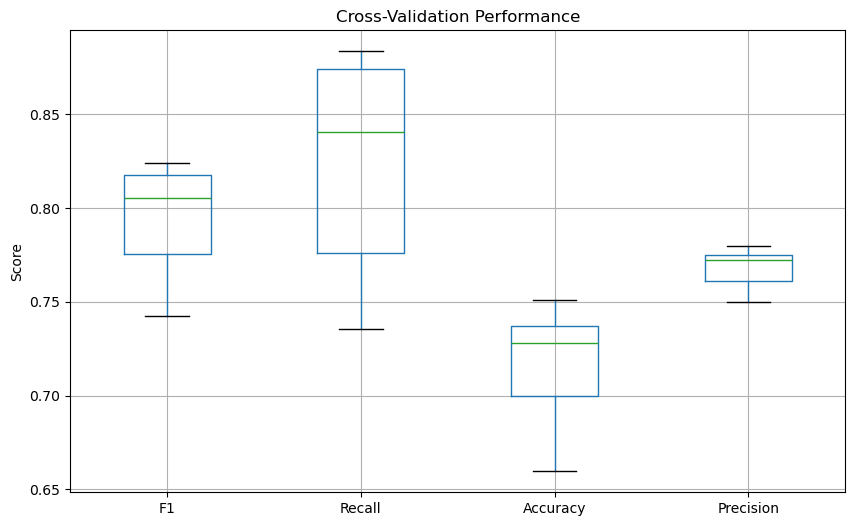

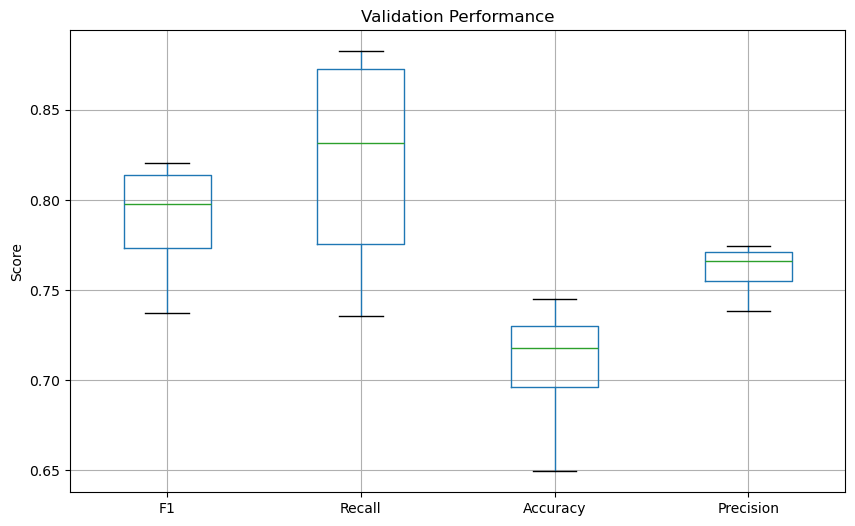

In [196]:
#plot

# Cross-Validation Performance Data
cv_data = {
    "Model": ["Bagging", "Random forest", "GBM", "Adaboost", "dtree"],
    "F1": cv_results_df['F1'],
    "Recall": cv_results_df['Recall'],
    "Accuracy": cv_results_df['Accuracy'],
    "Precision": cv_results_df['Precision'],
}
cv_df = pd.DataFrame(cv_data)

# Validation Performance Data
val_data = {
    "Model": ["Bagging", "Random forest", "GBM", "Adaboost", "dtree"],
    "F1": validation_results_df['F1'],
    "Recall": validation_results_df['Recall'],
    "Accuracy": validation_results_df['Accuracy'],
    "Precision": validation_results_df['Precision'],
}
val_df = pd.DataFrame(val_data)

# Creating Box Plots for Cross-Validation Performance
plt.figure(figsize=(10, 6))
cv_df.drop(columns=["Model"]).boxplot()
plt.title("Cross-Validation Performance")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Creating Box Plots for Validation Performance
plt.figure(figsize=(10, 6))
val_df.drop(columns=["Model"]).boxplot()
plt.title("Validation Performance")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

#### Defining scorer to be used for cross-validation and hyperparameter tuning
### F1 score considering the data is moderately imbalanced and recall and precision are equally important in this use case

### Model Building with oversampled data

In [391]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print(np.bincount(y_train))
# To avoid overfitting data since the data imbalanced, I will be using 0.5 for sampling_strategy to make the sample
# moderately balanced
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42) ## Complete the code to set the k-nearest neighbors and sampling strategy
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

[ 5923 11913]
After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 5956 

After OverSampling, the shape of train_X: (17869, 25500)
After OverSampling, the shape of train_y: (17869,) 



### Model Building with undersampled data

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

### Tuning Random forest using undersampled data

### Tuning with Gradient boosting with oversampled data

### Tuning XGBoost using oversampled data

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___